In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
ratings = pd.read_csv("C:/Users/hp compac/Downloads/archive (14)/ml-100k/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
ratings

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [3]:
movies = pd.read_csv("C:/Users/hp compac/Downloads/archive (14)/ml-100k/u.item", sep="|", encoding="latin-1", header=None, usecols=[0, 1], names=["movie_id", "title"])
movies

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [4]:
df = pd.merge(ratings, movies, on="movie_id")
df.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [5]:
df.shape

(100000, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100000 non-null  int64 
 1   movie_id   100000 non-null  int64 
 2   rating     100000 non-null  int64 
 3   timestamp  100000 non-null  int64 
 4   title      100000 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [8]:
df.describe(include="object")

,title
count,100000
unique,1664
top,Star Wars (1977)
freq,583


In [9]:
df.isna().sum().sum()

0

In [10]:
df.duplicated().sum()

0

In [11]:
df["rating"].value_counts()

rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

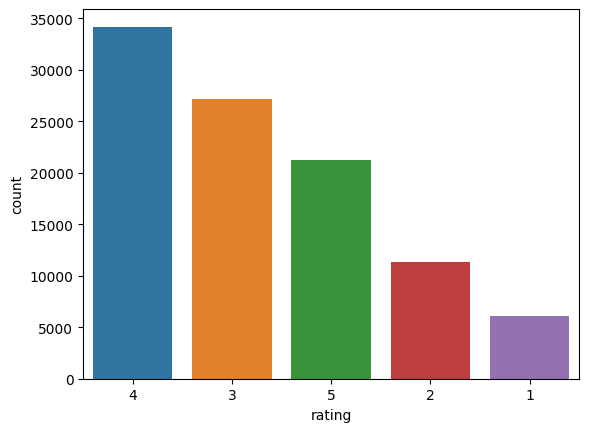

In [12]:
sns.countplot(data=df,x="rating",order=df["rating"].value_counts().index)


In [13]:
top10_movies = df["title"].value_counts().head(10).index
df1 = df[df["title"].isin(top10_movies)]
top10_movies

Index(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)',
       'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)',
       'Air Force One (1997)', 'Independence Day (ID4) (1996)'],
      dtype='object', name='title')

In [14]:
df["title"].value_counts().head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64

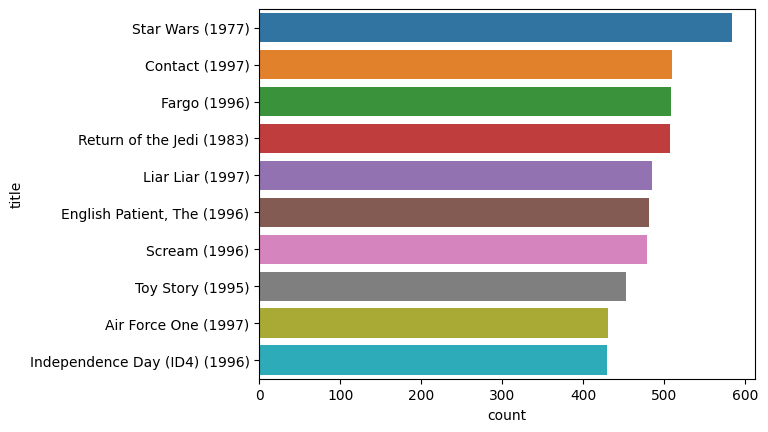

In [15]:
sns.countplot(data=df1,y="title",order=top10_movies)
plt.show()

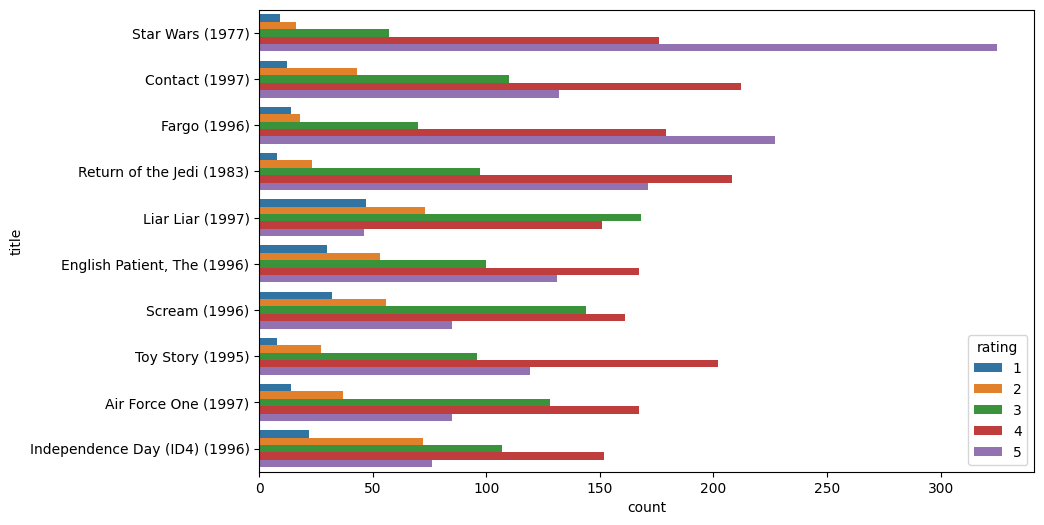

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1,y="title",order=top10_movies,hue="rating")
plt.show()

In [17]:
df["user_id"].unique

<bound method Series.unique of 0        196
1         63
2        226
3        154
4        306
        ... 
99995    840
99996    655
99997    655
99998    655
99999    655
Name: user_id, Length: 100000, dtype: int64>

<Axes: xlabel='user_id', ylabel='count'>

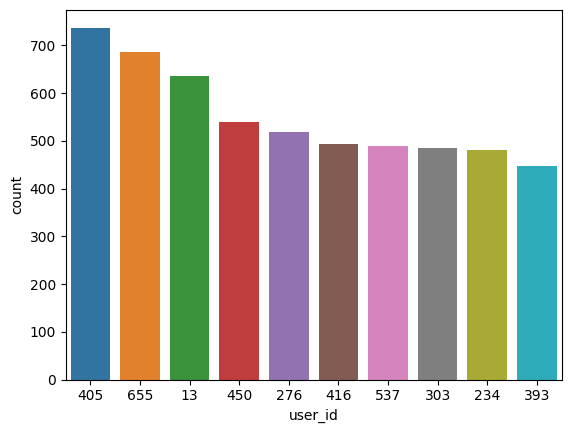

In [18]:
top10_user = df["user_id"].value_counts().head(10).index
df2 = df[df["user_id"].isin(top10_user)]
top10_user
sns.countplot(data=df2,x="user_id",order=top10_user)


<Axes: xlabel='user_id', ylabel='count'>

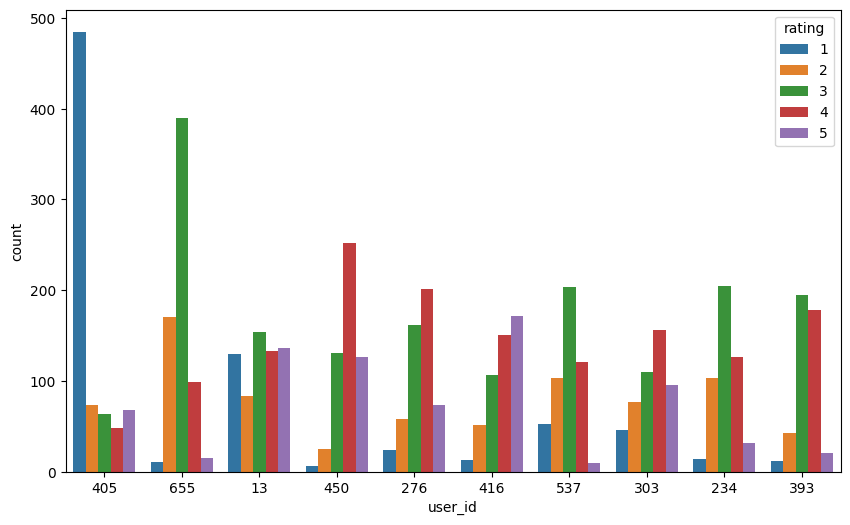

In [19]:
plt.figure(figsize=(10,6))
top10_user = df["user_id"].value_counts().head(10).index
df2 = df[df["user_id"].isin(top10_user)]
top10_user
sns.countplot(data=df2,x="user_id",order=top10_user,hue="rating")

In [20]:
user_item_matrix = df.pivot_table(index="user_id", columns="title", values="rating")
user_item_matrix.fillna(0, inplace=True)
user_item_matrix


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

item_similarity_df.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.000000,0.000000,0.024561,0.099561,0.185236,0.159265,0.000000,0.052203,0.000000,0.033326,...,0.000000,0.000000,0.000000,0.027774,0.118840,0.142315,0.029070,0.000000,0.110208,0.000000
1-900 (1994),0.000000,1.000000,0.014139,0.009294,0.007354,0.004702,0.010055,0.067038,0.000000,0.000000,...,0.152499,0.015484,0.000000,0.069284,0.018243,0.023408,0.006694,0.079640,0.042295,0.000000
101 Dalmatians (1996),0.024561,0.014139,1.000000,0.167006,0.061105,0.143878,0.203781,0.225803,0.027642,0.092337,...,0.000000,0.021965,0.030905,0.274877,0.204267,0.101199,0.056976,0.172155,0.045714,0.000000
12 Angry Men (1957),0.099561,0.009294,0.167006,1.000000,0.056822,0.167235,0.304078,0.422506,0.072682,0.394854,...,0.060946,0.016502,0.000000,0.403270,0.259436,0.145519,0.105226,0.038901,0.060101,0.081261
187 (1997),0.185236,0.007354,0.061105,0.056822,1.000000,0.132327,0.042928,0.065060,0.043133,0.027300,...,0.000000,0.141997,0.000000,0.068257,0.067786,0.091293,0.099490,0.025184,0.142667,0.096449


In [24]:
def recommend_movies_item_based(user_id, user_item_matrix, item_similarity_df, top_n=5):
    user_ratings = user_item_matrix.loc[user_id]
    seen_movies = user_ratings[user_ratings > 0].index
    
    scores = pd.Series(dtype=float)
    
    for movie, rating in user_ratings.items():
        if rating > 0:  # Only consider rated movies
            similar_scores = item_similarity_df[movie] * rating
            scores = scores.add(similar_scores, fill_value=0)
    
    # Remove movies already seen
    scores = scores.drop(seen_movies, errors="ignore")
    
    return scores.sort_values(ascending=False).head(top_n)

# Example for user 1
var=int(input("Enter the user_id"))
print(recommend_movies_item_based(var, user_item_matrix, item_similarity_df, top_n=5))


Enter the user_id 1


title
E.T. the Extra-Terrestrial (1982)    392.868044
Stand by Me (1986)                   366.958476
Speed (1994)                         366.715440
Batman (1989)                        363.956465
True Lies (1994)                     362.610997
dtype: float64


In [26]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, random_state=42)
latent_matrix = svd.fit_transform(user_item_matrix)
reconstructed = np.dot(latent_matrix, svd.components_)
reconstructed_df = pd.DataFrame(reconstructed, index=user_item_matrix.index, columns=user_item_matrix.columns)

def recommend_movies_svd(user_id, reconstructed_df, top_n=5):
    user_pred = reconstructed_df.loc[user_id]
    seen_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    
    recs = user_pred.drop(seen_movies).sort_values(ascending=False).head(top_n)
    return recs
var=int(input("Enter the user_id"))
print(recommend_movies_svd(var, reconstructed_df, top_n=5))


Enter the user_id 5


title
Brazil (1985)                             2.967346
Groundhog Day (1993)                      2.960420
Twelve Monkeys (1995)                     2.779649
Nightmare Before Christmas, The (1993)    2.539540
Raising Arizona (1987)                    2.468197
Name: 5, dtype: float64


In [35]:
from sklearn.model_selection import train_test_split

# Train-test split
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Build train matrix
train_matrix = train.pivot_table(index="user_id", columns="title", values="rating").fillna(0)

# Rebuild SVD on train
svd = TruncatedSVD(n_components=20, random_state=42)
latent_matrix = svd.fit_transform(train_matrix)
reconstructed = np.dot(latent_matrix, svd.components_)
reconstructed_df = pd.DataFrame(reconstructed, index=train_matrix.index, columns=train_matrix.columns)

def precision_at_k(user_id, reconstructed_df, test, k=5):
    user_pred = reconstructed_df.loc[user_id]
    seen_movies = train_matrix.loc[user_id][train_matrix.loc[user_id] > 0].index
    recs = user_pred.drop(seen_movies).sort_values(ascending=False).head(k).index
    
    # Actual test movies for user
    actual = test[test["user_id"] == user_id]["title"].values
    
    relevant = [m for m in recs if m in actual]
    return len(relevant) / k

# Example evaluation for a user
print("Precision@5 for user 1:", precision_at_k(8, reconstructed_df, test, k=5))


Precision@5 for user 1: 0.4
